In [3]:
import sys
sys.path.append("code")

import numpy as np
from plyfile import PlyData, PlyElement
from sklearn.neighbors import KNeighborsClassifier
from ply import write_ply
import matplotlib.pyplot as plt

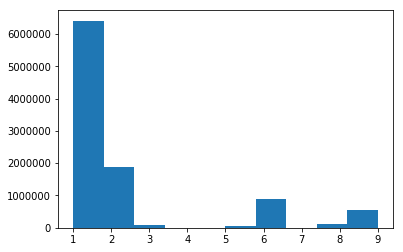

In [ ]:
def extend_prediction(input_dir, input_pred, output_path, n_neighbors = 10):
    pred = PlyData.read(input_pred)
    columns = ["x", "y", "z", "class"]
    pred = np.array([pred.elements[0].data[i] for i in columns[:len(pred.elements[0].properties)]]).transpose()
    
    to_pred = PlyData.read(input_dir)
    columns = ["x", "y", "z"]
    to_pred = np.array([to_pred.elements[0].data[i] for i in columns[:len(to_pred.elements[0].properties)]]).transpose()
    
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(pred[:, :3], pred[:, -1])
    
    prediction = clf.predict(to_pred)
    
    plt.hist(prediction)
    plt.show()
    
    write_ply(output_path[:-4] + ".ply",
              [to_pred, prediction],
              ['x', 'y', 'z', 'class'])
    np.savetxt(output_path, prediction, fmt='%d')
    
    return

#for fn in ["ajaccio_2", "ajaccio_57", "dijon_9"]:
for fn in ["dijon_9"]:
    extend_prediction("../Benchmark/test_10_classes/{}.ply".format(fn), "{}_prediction.ply".format(fn), "{}.txt".format(fn))